# 1. Building ML Models for Detecting Skin Cancer 

## Data Preparation

In [49]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
b_folder = "SkinCancerData/test/benign/"
m_folder = "SkinCancerData/test/malignant/"

b_images = sorted(os.listdir(b_folder))
m_images = sorted(os.listdir(m_folder))

X = []
y = []

for image in b_images:
    image_name = os.path.join(b_folder, image)
    X.append(np.array(Image.open(image_name)).flatten())
    y.append(0)  

for image in m_images:
    image_name = os.path.join(m_folder, image)
    X.append(np.array(Image.open(image_name)).flatten())
    y.append(1) 

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X.shape)
print(y.shape)

(660, 150528)
(660,)


## Using MLP Classifier

In [63]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

joblib.dump(model, 'TrainedModel/skin_cancer_model_mlp.pkl')

Training Accuracy: 0.46702317290552586
Testing Accuracy: 0.3838383838383838


['TrainedModel/skin_cancer_model_mlp.pkl']

## Using Decision Tree

In [64]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)  

y_pred_train = model.predict(X_train.reshape(X_train.shape[0], -1))
y_pred_test = model.predict(X_test.reshape(X_test.shape[0], -1))

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


joblib.dump(model, 'TrainedModel/skin_cancer_model_reg.pkl')

Training Accuracy: 1.0
Testing Accuracy: 0.7373737373737373


['TrainedModel/skin_cancer_model_reg.pkl']

## Using Logistic Regression

In [65]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

joblib.dump(model, 'TrainedModel/skin_cancer_model_log.pkl')

Training Accuracy: 1.0
Testing Accuracy: 0.8383838383838383


['TrainedModel/skin_cancer_model_log.pkl']

## Using Random Forest

In [66]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)  

y_pred_train = model.predict(X_train.reshape(X_train.shape[0], -1))
y_pred_test = model.predict(X_test.reshape(X_test.shape[0], -1))


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


joblib.dump(model, 'TrainedModel/skin_cancer_model_rf.pkl')

Training Accuracy: 1.0
Testing Accuracy: 0.8282828282828283


['TrainedModel/skin_cancer_model_rf.pkl']

# 2. Building ML Models for Detecting Other Skin Problems

## Data Preparation

In [67]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [75]:
# List of folders corresponding to the classes
folders = [
    "SkinDiseaseData/test/Warts Molluscum and other Viral Infections/",
    "SkinDiseaseData/test/Vasculitis Photos/",
    "SkinDiseaseData/test/Vascular Tumors/",
    "SkinDiseaseData/test/Urticaria Hives/",
    "SkinDiseaseData/test/Tinea Ringworm Candidiasis and other Fungal Infections/",
    "SkinDiseaseData/test/Systemic Disease/",
    "SkinDiseaseData/test/Seborrheic Keratoses and other Benign Tumors/",
    "SkinDiseaseData/test/Psoriasis pictures Lichen Planus and related diseases/",
    "SkinDiseaseData/test/Poison Ivy Photos and other Contact Dermatitis/",
    "SkinDiseaseData/test/Melanoma Skin Cancer Nevi and Moles/",
    "SkinDiseaseData/test/Lupus and other Connective Tissue diseases/",
    "SkinDiseaseData/test/Light Diseases and Disorders of Pigmentation/",
    "SkinDiseaseData/test/Herpes HPV and other STDs Photos/",
    "SkinDiseaseData/test/Exanthems and Drug Eruptions/",
    "SkinDiseaseData/test/Eczema Photos/",
    "SkinDiseaseData/test/Cellulitis Impetigo and other Bacterial Infections/",
    "SkinDiseaseData/test/Bullous Disease Photos/",
    "SkinDiseaseData/test/Atopic Dermatitis Photos/",
    "SkinDiseaseData/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/",
    "SkinDiseaseData/test/Acne and Rosacea Photos/"
]

X = []
y = []

img_size = (256, 256) 
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff") 


for class_index, folder in enumerate(folders):
    for image in sorted(os.listdir(folder)):
        image_path = os.path.join(folder, image)
        if os.path.isdir(image_path):
            continue
        if image.lower().endswith(valid_extensions):
            try:
                img = Image.open(image_path).convert('RGB').resize(img_size) 
                X.append(np.array(img).flatten())  
                y.append(class_index)  
            except Exception as e:
                print(f"Error processing {image_path}: {e}")
                continue 

X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(693, 196608)
(693,)


In [76]:
#y = tf.keras.utils.to_categorical(y, num_classes=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)


X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train)
print(y_train)

[[0.11764706 0.1254902  0.28627451 ... 0.76078431 0.80784314 0.90196078]
 [0.61960784 0.49411765 0.4627451  ... 0.22745098 0.17647059 0.14509804]
 [0.77254902 0.52941176 0.56470588 ... 0.30980392 0.24313725 0.21568627]
 ...
 [0.41568627 0.33333333 0.26666667 ... 0.63921569 0.45882353 0.37254902]
 [0.84705882 0.73333333 0.48627451 ... 0.86666667 0.78823529 0.58431373]
 [0.59607843 0.37647059 0.37254902 ... 0.49411765 0.30980392 0.2627451 ]]
[ 2 18  0  4 11  0 19  7  0  4  5 19  9  7 19  5 18 19  7 19 19  2 18 13
 18  0  4 19  2 13 19  0  5 19 18  4  2  1  8 19 18 19 17 19  0 13 19 19
 19  2 19 18  0  6 19 19 17 18 18 18 17 15 18 19 18  8 19 18  6 19  6 11
 19 19 19 11 18  4  4 19  7 11  4  0  3 19 18 19 18 18  7  5  0  0  0  2
  6  7 19  2  0 19 19  6 11 18 19 12 18  6 18 19  2 19 18 18  2  0  0 19
 10 19 11 19 11  5 18 17  0 18 18  0  0 18  8 19 19 17  2 17 17 19 11  7
  7 19 15 18  4 19 12 14 19  6 19 12  5  2 19  2 19  6 10  2 19  4  4 19
 10  0 19 11 19 18 11  4  9 19 19 11 18  5 19

## Using MLP

In [77]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

joblib.dump(m_model, 'TrainedModel/skin_issues_model_mlp.pkl')

Training Accuracy: 0.3310696095076401
Testing Accuracy: 0.34615384615384615


['TrainedModel/skin_issues_model_mlp.pkl']

## Using Random Forest

In [78]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)  

y_pred_train = model.predict(X_train.reshape(X_train.shape[0], -1))
y_pred_test = model.predict(X_test.reshape(X_test.shape[0], -1))


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


joblib.dump(model, 'TrainedModel/skin_issues_model_rf.pkl')

Training Accuracy: 1.0
Testing Accuracy: 0.4230769230769231


['TrainedModel/skin_issues_model_rf.pkl']

## Using Logistic Regression

In [80]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

joblib.dump(model, 'TrainedModel/skin_issues_model_log.pkl')

Training Accuracy: 1.0
Testing Accuracy: 0.34615384615384615


['TrainedModel/skin_issues_model_log.pkl']

## CNN Model Construction

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(), 

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')  
])

cnn_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32),
                        validation_data=(X_test, y_test),
                        epochs=50, 
                        callbacks=[early_stopping, reduce_lr])

train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (589, 196608)

# Alternative Approach

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [83]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'SkinDiseaseData/train',  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'SkinDiseaseData/',  # Path to testing data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 2609 images belonging to 19 classes.
Found 3506 images belonging to 2 classes.


In [84]:
path = 'SkinDiseaseData/train/' 

In [85]:
import os

In [86]:
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)

print('classes: ', class_names)

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [87]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [88]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

import cv2

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])#That line remove Blue
        
        images.append(image)
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

Acne and Rosacea Photos -> done
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> done
Atopic Dermatitis Photos -> done
Cellulitis Impetigo and other Bacterial Infections -> done
Eczema Photos -> done
Exanthems and Drug Eruptions -> done
Herpes HPV and other STDs Photos -> done
Light Diseases and Disorders of Pigmentation -> done
Lupus and other Connective Tissue diseases -> done
Melanoma Skin Cancer Nevi and Moles -> done
Poison Ivy Photos and other Contact Dermatitis -> done
Psoriasis pictures Lichen Planus and related diseases -> done
Seborrheic Keratoses and other Benign Tumors -> done
Systemic Disease -> done
Tinea Ringworm Candidiasis and other Fungal Infections -> done
Urticaria Hives -> done
Vascular Tumors -> done
Vasculitis Photos -> done
Warts Molluscum and other Viral Infections -> done


labels shape: (2609, 19)
images shape: (2609, 192, 192, 3)


In [89]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_test.shape}\nvalidation labels shape: {y_test.shape}\n')

train images shape: (2217, 192, 192, 3)
train labels shape: (2217, 19)

validation images shape: (392, 192, 192, 3)
validation labels shape: (392, 19)



In [90]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

import tensorflow as tf

cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 192, 192, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 192, 192, 64)      1792      
                                                                 
 conv2d_20 (Conv2D)          (None, 192, 192, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 96, 96, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 96, 96, 128)       32896     
                                                                 
 conv2d_22 (Conv2D)          (None, 96, 96, 128)       65664     
                                                      

In [91]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

from tensorflow.keras.callbacks import ModelCheckpoint

# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('TrainedModel/cnn_model/model{epoch:02d}')

In [92]:
history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_test, y_test), callbacks=[checkpoint_callback])

Epoch 1/20
82/82 [==============================] - ETA: 0s - loss: 2.4542 - accuracy: 0.3128INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model01/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model01/assets


82/82 [==============================] - 263s 3s/step - loss: 2.4542 - accuracy: 0.3128 - val_loss: 2.3761 - val_accuracy: 0.3265
Epoch 2/20
82/82 [==============================] - ETA: 0s - loss: 2.3471 - accuracy: 0.3216INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model02/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model02/assets


82/82 [==============================] - 267s 3s/step - loss: 2.3471 - accuracy: 0.3216 - val_loss: 2.3383 - val_accuracy: 0.3265
Epoch 3/20
82/82 [==============================] - ETA: 0s - loss: 2.2841 - accuracy: 0.3285INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model03/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model03/assets


82/82 [==============================] - 267s 3s/step - loss: 2.2841 - accuracy: 0.3285 - val_loss: 2.2612 - val_accuracy: 0.3316
Epoch 4/20
82/82 [==============================] - ETA: 0s - loss: 2.2286 - accuracy: 0.3292INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model04/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model04/assets


82/82 [==============================] - 276s 3s/step - loss: 2.2286 - accuracy: 0.3292 - val_loss: 2.2101 - val_accuracy: 0.3495
Epoch 5/20
82/82 [==============================] - ETA: 0s - loss: 2.1746 - accuracy: 0.3519INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model05/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model05/assets


82/82 [==============================] - 267s 3s/step - loss: 2.1746 - accuracy: 0.3519 - val_loss: 2.2113 - val_accuracy: 0.3393
Epoch 6/20
82/82 [==============================] - ETA: 0s - loss: 2.1250 - accuracy: 0.3660INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model06/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model06/assets


82/82 [==============================] - 269s 3s/step - loss: 2.1250 - accuracy: 0.3660 - val_loss: 2.0513 - val_accuracy: 0.3878
Epoch 7/20
82/82 [==============================] - ETA: 0s - loss: 2.0046 - accuracy: 0.3967INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model07/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model07/assets


82/82 [==============================] - 277s 3s/step - loss: 2.0046 - accuracy: 0.3967 - val_loss: 1.8645 - val_accuracy: 0.4490
Epoch 8/20
82/82 [==============================] - ETA: 0s - loss: 1.8333 - accuracy: 0.4458INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model08/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model08/assets


82/82 [==============================] - 270s 3s/step - loss: 1.8333 - accuracy: 0.4458 - val_loss: 1.5709 - val_accuracy: 0.5434
Epoch 9/20
82/82 [==============================] - ETA: 0s - loss: 1.5612 - accuracy: 0.5247INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model09/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model09/assets


82/82 [==============================] - 279s 3s/step - loss: 1.5612 - accuracy: 0.5247 - val_loss: 1.2596 - val_accuracy: 0.6173
Epoch 10/20
82/82 [==============================] - ETA: 0s - loss: 1.2542 - accuracy: 0.6163INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model10/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model10/assets


82/82 [==============================] - 265s 3s/step - loss: 1.2542 - accuracy: 0.6163 - val_loss: 0.9520 - val_accuracy: 0.7372
Epoch 11/20
82/82 [==============================] - ETA: 0s - loss: 0.9158 - accuracy: 0.7240INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model11/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model11/assets


82/82 [==============================] - 265s 3s/step - loss: 0.9158 - accuracy: 0.7240 - val_loss: 0.6745 - val_accuracy: 0.8036
Epoch 12/20
82/82 [==============================] - ETA: 0s - loss: 0.6300 - accuracy: 0.8068INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model12/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model12/assets


82/82 [==============================] - 266s 3s/step - loss: 0.6300 - accuracy: 0.8068 - val_loss: 0.4393 - val_accuracy: 0.8878
Epoch 13/20
82/82 [==============================] - ETA: 0s - loss: 0.4451 - accuracy: 0.8823INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model13/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model13/assets


82/82 [==============================] - 264s 3s/step - loss: 0.4451 - accuracy: 0.8823 - val_loss: 0.2854 - val_accuracy: 0.9286
Epoch 14/20
82/82 [==============================] - ETA: 0s - loss: 0.2997 - accuracy: 0.9199INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model14/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model14/assets


82/82 [==============================] - 266s 3s/step - loss: 0.2997 - accuracy: 0.9199 - val_loss: 0.1492 - val_accuracy: 0.9668
Epoch 15/20
82/82 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.9444INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model15/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model15/assets


82/82 [==============================] - 268s 3s/step - loss: 0.2347 - accuracy: 0.9444 - val_loss: 0.1461 - val_accuracy: 0.9694
Epoch 16/20
82/82 [==============================] - ETA: 0s - loss: 0.1904 - accuracy: 0.9563INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model16/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model16/assets


82/82 [==============================] - 271s 3s/step - loss: 0.1904 - accuracy: 0.9563 - val_loss: 0.1266 - val_accuracy: 0.9719
Epoch 17/20
82/82 [==============================] - ETA: 0s - loss: 0.1701 - accuracy: 0.9617INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model17/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model17/assets


82/82 [==============================] - 285s 3s/step - loss: 0.1701 - accuracy: 0.9617 - val_loss: 0.1565 - val_accuracy: 0.9745
Epoch 18/20
82/82 [==============================] - ETA: 0s - loss: 0.1516 - accuracy: 0.9667INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model18/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model18/assets


82/82 [==============================] - 278s 3s/step - loss: 0.1516 - accuracy: 0.9667 - val_loss: 0.1180 - val_accuracy: 0.9745
Epoch 19/20
82/82 [==============================] - ETA: 0s - loss: 0.1271 - accuracy: 0.9736INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model19/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model19/assets


82/82 [==============================] - 276s 3s/step - loss: 0.1271 - accuracy: 0.9736 - val_loss: 0.1349 - val_accuracy: 0.9643
Epoch 20/20
82/82 [==============================] - ETA: 0s - loss: 0.1216 - accuracy: 0.9732 INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model20/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model20/assets


82/82 [==============================] - 3832s 47s/step - loss: 0.1216 - accuracy: 0.9732 - val_loss: 0.0910 - val_accuracy: 0.9745


In [93]:
cnn_model.save('TrainedModel/cnn_skin_issues_trainingUsingAllData')

INFO:tensorflow:Assets written to: TrainedModel/cnn_skin_issues_trainingUsingAllData/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_skin_issues_trainingUsingAllData/assets


In [94]:
cnn_model.save('TrainedModel/cnn_skin_issues_trainingUsingAllData.h5')

/Users/jinzhugao/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
history2 = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[checkpoint_callback])

Epoch 1/20
70/70 [==============================] - ETA: 0s - loss: 0.1144 - accuracy: 0.9779INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model01/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model01/assets


70/70 [==============================] - 254s 4s/step - loss: 0.1144 - accuracy: 0.9779 - val_loss: 0.1522 - val_accuracy: 0.9643
Epoch 2/20
70/70 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9779INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model02/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model02/assets


70/70 [==============================] - 240s 3s/step - loss: 0.1007 - accuracy: 0.9779 - val_loss: 0.1969 - val_accuracy: 0.9541
Epoch 3/20
70/70 [==============================] - ETA: 0s - loss: 0.1104 - accuracy: 0.9734INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model03/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model03/assets


70/70 [==============================] - 237s 3s/step - loss: 0.1104 - accuracy: 0.9734 - val_loss: 0.2311 - val_accuracy: 0.9337
Epoch 4/20
70/70 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9806INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model04/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model04/assets


70/70 [==============================] - 251s 4s/step - loss: 0.0944 - accuracy: 0.9806 - val_loss: 0.1990 - val_accuracy: 0.9566
Epoch 5/20
70/70 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9829INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model05/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model05/assets


70/70 [==============================] - 265s 4s/step - loss: 0.0717 - accuracy: 0.9829 - val_loss: 0.2086 - val_accuracy: 0.9617
Epoch 6/20
70/70 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9842INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model06/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model06/assets


70/70 [==============================] - 268s 4s/step - loss: 0.0684 - accuracy: 0.9842 - val_loss: 0.2211 - val_accuracy: 0.9617
Epoch 7/20
70/70 [==============================] - ETA: 0s - loss: 0.0678 - accuracy: 0.9820INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model07/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model07/assets


70/70 [==============================] - 271s 4s/step - loss: 0.0678 - accuracy: 0.9820 - val_loss: 0.1997 - val_accuracy: 0.9592
Epoch 8/20
70/70 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9833INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model08/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model08/assets


70/70 [==============================] - 263s 4s/step - loss: 0.0568 - accuracy: 0.9833 - val_loss: 0.2192 - val_accuracy: 0.9541
Epoch 9/20
70/70 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9842INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model09/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model09/assets


70/70 [==============================] - 261s 4s/step - loss: 0.0568 - accuracy: 0.9842 - val_loss: 0.2240 - val_accuracy: 0.9541
Epoch 10/20
70/70 [==============================] - ETA: 0s - loss: 0.0548 - accuracy: 0.9860INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model10/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model10/assets


70/70 [==============================] - 251s 4s/step - loss: 0.0548 - accuracy: 0.9860 - val_loss: 0.2203 - val_accuracy: 0.9490
Epoch 11/20
70/70 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9761INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model11/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model11/assets


70/70 [==============================] - 264s 4s/step - loss: 0.0750 - accuracy: 0.9761 - val_loss: 0.2282 - val_accuracy: 0.9515
Epoch 12/20
70/70 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9838INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model12/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model12/assets


70/70 [==============================] - 255s 4s/step - loss: 0.0631 - accuracy: 0.9838 - val_loss: 0.2772 - val_accuracy: 0.9439
Epoch 13/20
70/70 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9838INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model13/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model13/assets


70/70 [==============================] - 263s 4s/step - loss: 0.0552 - accuracy: 0.9838 - val_loss: 0.2428 - val_accuracy: 0.9541
Epoch 14/20
70/70 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.9829INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model14/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model14/assets


70/70 [==============================] - 260s 4s/step - loss: 0.0516 - accuracy: 0.9829 - val_loss: 0.2279 - val_accuracy: 0.9566
Epoch 15/20
70/70 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9847INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model15/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model15/assets


70/70 [==============================] - 247s 4s/step - loss: 0.0514 - accuracy: 0.9847 - val_loss: 0.2322 - val_accuracy: 0.9515
Epoch 16/20
70/70 [==============================] - ETA: 0s - loss: 0.0486 - accuracy: 0.9842INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model16/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model16/assets


70/70 [==============================] - 264s 4s/step - loss: 0.0486 - accuracy: 0.9842 - val_loss: 0.2732 - val_accuracy: 0.9490
Epoch 17/20
70/70 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9838INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model17/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model17/assets


70/70 [==============================] - 270s 4s/step - loss: 0.0461 - accuracy: 0.9838 - val_loss: 0.3136 - val_accuracy: 0.9413
Epoch 18/20
70/70 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9833INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model18/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model18/assets


70/70 [==============================] - 264s 4s/step - loss: 0.0501 - accuracy: 0.9833 - val_loss: 0.2573 - val_accuracy: 0.9515
Epoch 19/20
70/70 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9838INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model19/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model19/assets


70/70 [==============================] - 266s 4s/step - loss: 0.0449 - accuracy: 0.9838 - val_loss: 0.3146 - val_accuracy: 0.9260
Epoch 20/20
70/70 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9838INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model20/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_model/model20/assets


70/70 [==============================] - 263s 4s/step - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.3270 - val_accuracy: 0.9260


In [96]:
cnn_model.save('TrainedModel/cnn_skin_issues')

INFO:tensorflow:Assets written to: TrainedModel/cnn_skin_issues/assets


INFO:tensorflow:Assets written to: TrainedModel/cnn_skin_issues/assets


In [97]:
cnn_model.save('TrainedModel/cnn_skin_issues.h5')

/Users/jinzhugao/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


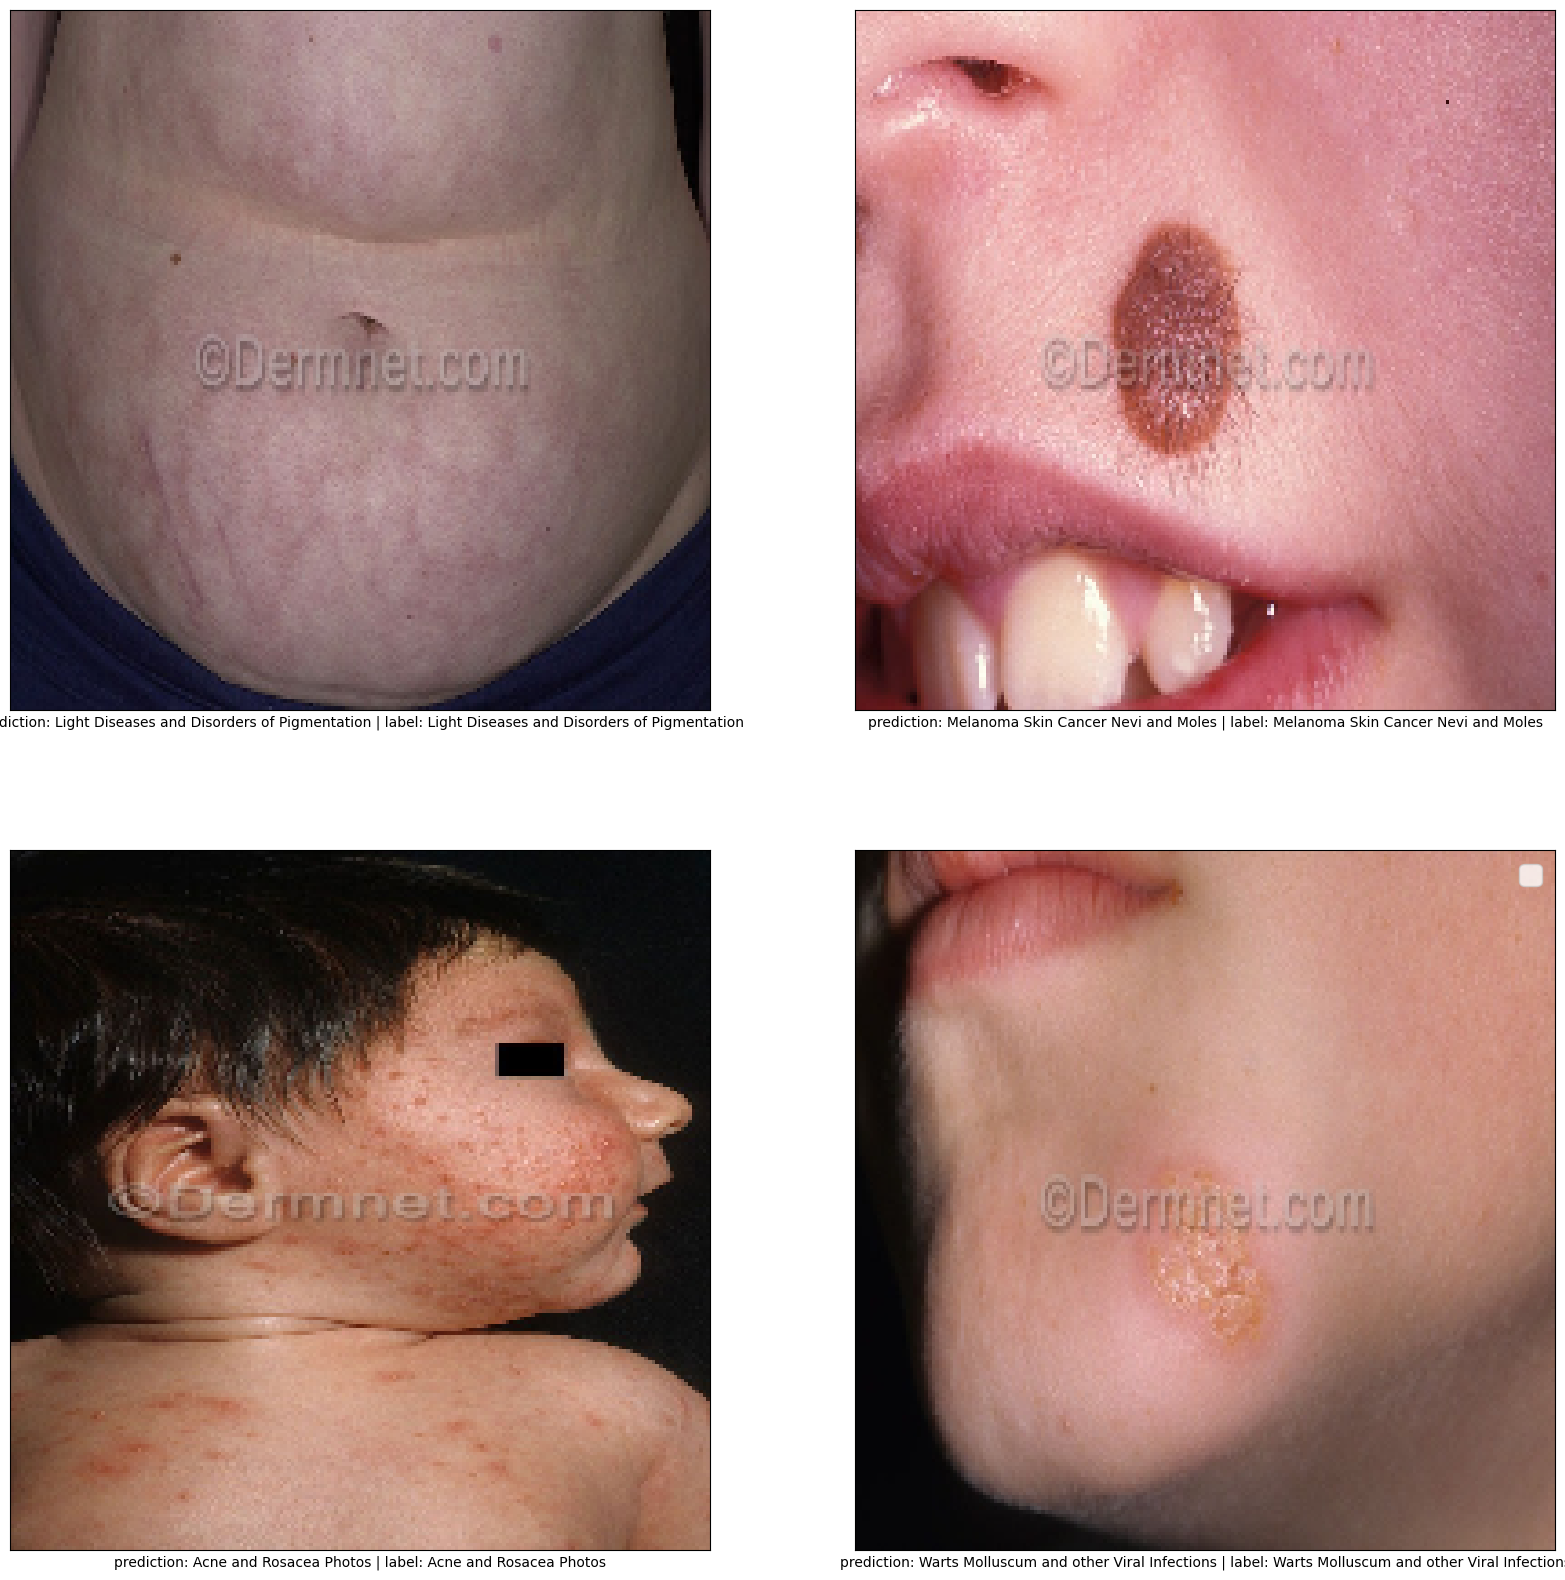

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))#Original was 7,4 (28 is higher than 25) and figsize 15,15
plt.legend(fontsize="20")#I can't read any of them

i = 0
for x in range(2): #Original was 7 so resulted in error 7X4 = 28
    for y in range(2):
        prediction = cnn_model.predict(X_test[i][None, ...], verbose=0)[0],
       
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_test[i])]}')
        
        axs[x][y].imshow(X_test[i])
        
        i += 1
plt.show()

# 3. Web App Development using Streamlit

In [24]:
# pip install streamlit

In [23]:
import streamlit as st
import numpy as np
from PIL import Image
import joblib

# Load the trained KNN model
model_file_path = 'skin_cancer_model_log.pkl'
model = joblib.load(model_file_path)

# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to a fixed size (e.g., 128x128)
    size = (224, 224)
    image = image.resize(size)
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Flatten the image array
    image_flattened = image_array.flatten()
    return image_flattened


def main():
    st.title("Skin Cancer Detection App")

    st.write("Please note that this app is not 100% accurate. If your result happens to be malignant, please contact a medical professional for further instructions.")

    st.write("**Upload an image to detect if it's benign or malignant:**")

    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image', use_column_width=True)

        # Preprocess the image
        processed_image = preprocess_image(image)

        # Make prediction
        prediction = model.predict([processed_image])[0]
        class_names = {0: 'Benign', 1: 'Malignant'}
        result = class_names[prediction]

        st.write(f"Prediction: {result}")
    st.write("**Please click the button if you have had a large amount of sun exposure:**")
    result = st.button("Yes")
    if result:
        st.write("Please note that high levels of sun exposure can lead to a higher risk of skin cancer.")

if __name__ == '__main__':
    main()

2024-09-13 14:32:44.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 14:32:44.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 14:32:44.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 14:32:44.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 14:32:44.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 14:32:44.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 14:32:44.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 14:32:44.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar